<a href="https://colab.research.google.com/github/nk8125/Portfolio-optimization/blob/main/classicalmodelusingscipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Description:This program attempts to optimize a users portfolio using the Scipy

1. Make my code robust for any given inputs it should work.
2. Plot a pie chart of allocations.
3. Find another method to calculate returns.
4. Find five more objective functions for portfolio optimization function execpt max return and min volatility.

In [3]:
#import libaries
from pandas_datareader  import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [4]:
#Get the stock symbols/tickers in the portfolio
#FAANG
assets = ['AAPL', 'MSFT', 'WMT','PG','AMZN','NVDA','AMD']

In [5]:
number_of_symbols=len(assets)
number_of_symbols

7

In [6]:
#Assign weight to the stocks 
import random
n = number_of_symbols
weights = [random.random() for _ in range(n)]
sum_weights = sum(weights)
weights = [1*w/sum_weights for w in weights]
print(weights)

[0.13355793781827582, 0.04407137824022909, 0.11877626710942624, 0.3232870626943047, 0.05565142053443954, 0.14285717483949878, 0.1817987587638259]


In [7]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [8]:
import yfinance as yf
import pandas as pd

# Set the start and end date
start_date = '2017-01-01'

# Create placeholder for data
data = pd.DataFrame(columns=assets)

# Fetch the data
for ticker in assets:
    data[ticker] = yf.download(ticker, 
                               start_date)['Adj Close']
data
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,WMT,PG,AMZN,NVDA,AMD
Date,,,,,,,
2017-01-03 00:00:00-05:00,27.174755,57.645378,61.081329,70.810143,37.683498,25.147223,11.430000
2017-01-04 00:00:00-05:00,27.144341,57.387440,61.437172,71.062454,37.859001,25.733934,11.430000
2017-01-05 00:00:00-05:00,27.282377,57.387440,61.570629,71.533401,39.022499,25.080660,11.240000
2017-01-06 00:00:00-05:00,27.586531,57.884865,60.725498,71.508171,39.799500,25.415926,11.320000
2017-01-09 00:00:00-05:00,27.839205,57.700626,61.125801,70.978355,39.846001,26.446365,11.490000
...,...,...,...,...,...,...,...
2023-01-24 00:00:00-05:00,142.529999,242.039993,143.020004,141.820007,96.320000,192.649994,74.699997
2023-01-25 00:00:00-05:00,141.860001,240.610001,142.339996,141.720001,97.180000,193.229996,74.910004
2023-01-26 00:00:00-05:00,143.960007,248.000000,142.210007,141.149994,99.220001,198.020004,75.160004


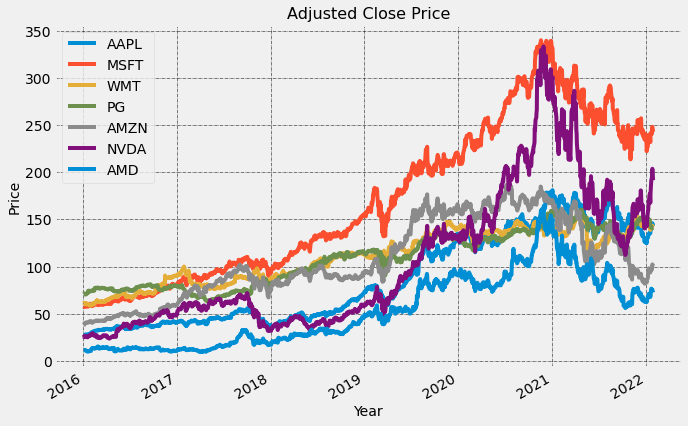

In [9]:
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [10]:
#show the return using pct_change()
returns=data.pct_change()
returns

,AAPL,MSFT,WMT,PG,AMZN,NVDA,AMD
Date,,,,,,,
2017-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00-05:00,-0.001119,-0.004475,0.005826,0.003563,0.004657,0.023331,0.000000
2017-01-05 00:00:00-05:00,0.005085,0.000000,0.002172,0.006627,0.030732,-0.025386,-0.016623
2017-01-06 00:00:00-05:00,0.011148,0.008668,-0.013726,-0.000353,0.019912,0.013368,0.007117
2017-01-09 00:00:00-05:00,0.009159,-0.003183,0.006592,-0.007409,0.001168,0.040543,0.015018
...,...,...,...,...,...,...,...
2023-01-24 00:00:00-05:00,0.010063,-0.002226,0.002664,0.005459,-0.012305,0.003751,-0.023912
2023-01-25 00:00:00-05:00,-0.004701,-0.005908,-0.004755,-0.000705,0.008929,0.003011,0.002811
2023-01-26 00:00:00-05:00,0.014803,0.030714,-0.000913,-0.004022,0.020992,0.024789,0.003337


In [11]:
returns.head()

,AAPL,MSFT,WMT,PG,AMZN,NVDA,AMD
Date,,,,,,,
2017-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 00:00:00-05:00,-0.001119,-0.004475,0.005826,0.003563,0.004657,0.023331,0.000000
2017-01-05 00:00:00-05:00,0.005085,0.000000,0.002172,0.006627,0.030732,-0.025386,-0.016623
2017-01-06 00:00:00-05:00,0.011148,0.008668,-0.013726,-0.000353,0.019912,0.013368,0.007117
2017-01-09 00:00:00-05:00,0.009159,-0.003183,0.006592,-0.007409,0.001168,0.040543,0.015018


In [12]:
#create and show the annualise covariance matrix
cov_matrix_annual= returns.cov()* 252
cov_matrix_annual.head()

,AAPL,MSFT,WMT,PG,AMZN,NVDA,AMD
AAPL,0.098302,0.068484,0.025525,0.026383,0.068089,0.100754,0.094174
MSFT,0.068484,0.084124,0.025589,0.027120,0.069619,0.099864,0.088476
WMT,0.025525,0.025589,0.051387,0.022536,0.022521,0.033026,0.027834
PG,0.026383,0.027120,0.022536,0.041694,0.017404,0.028338,0.025734
AMZN,0.068089,0.069619,0.022521,0.017404,0.114722,0.104460,0.099576


In [13]:
returns.cov()

,AAPL,MSFT,WMT,PG,AMZN,NVDA,AMD
AAPL,0.000390,0.000272,0.000101,0.000105,0.000270,0.000400,0.000374
MSFT,0.000272,0.000334,0.000102,0.000108,0.000276,0.000396,0.000351
WMT,0.000101,0.000102,0.000204,0.000089,0.000089,0.000131,0.000110
PG,0.000105,0.000108,0.000089,0.000165,0.000069,0.000112,0.000102
AMZN,0.000270,0.000276,0.000089,0.000069,0.000455,0.000415,0.000395
NVDA,0.000400,0.000396,0.000131,0.000112,0.000415,0.001002,0.000789
AMD,0.000374,0.000351,0.000110,0.000102,0.000395,0.000789,0.001291


In [14]:
returns.mean()

AAPL    0.001282
MSFT    0.001108
WMT     0.000655
PG      0.000533
AMZN    0.000870
NVDA    0.001833
AMD     0.001854
dtype: float64

In [15]:
#optimization function
def portfolio(weights):
  weights = np.array(weights)
  expected_return = np.sum((returns.mean()* weights) * 252)
  expected_vol = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
  sharpe_r = expected_return/expected_vol
  return np.array([expected_return,expected_vol,sharpe_r])

def sr_negate(weights):
  neg_sr = portfolio(weights)[2] * -1
  return neg_sr

def weight_check(weights):
  weights_sum = np.sum(weights)
  return weights_sum - 1
def insert_tuples(n):
    return [(0, 1) for i in range(n)]

In [16]:
#using scipy libary for optimaization(minimize) using solver Sequential Least-Squares Programming (SLSQP)
from scipy.optimize import minimize
constraints = ({'type':'eq','fun':weight_check})
initial_guess = weights
bounds=insert_tuples(number_of_symbols)
results = minimize(sr_negate,weights,method='SLSQP',bounds=bounds,constraints=constraints)
results

     fun: -1.162869611540745
     jac: array([-1.20103359e-05, -7.52061605e-05, -6.02006912e-06, -7.41183758e-05,
        2.10668355e-01,  6.74873590e-05,  1.78530812e-04])
 message: 'Optimization terminated successfully'
    nfev: 64
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([3.28676347e-01, 8.50701939e-02, 2.90447816e-01, 1.22442956e-01,
       4.05491613e-17, 8.81195737e-02, 8.52431130e-02])

Expected Return=27.49%
Expected votality=23.64%
Sharpe Ratio=1.16
**OPTIMIZED WEIGHTS**


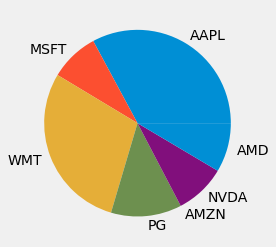

In [17]:
#show data
optimized_metrics = portfolio(results.x)
print("Expected Return={:.2f}%".format(optimized_metrics[0]*100))
print("Expected votality={:.2f}%".format(optimized_metrics[1]*100))
print("Sharpe Ratio={:.2f}".format(optimized_metrics[2]))
print("**OPTIMIZED WEIGHTS**")
results.x
plt.pie(results.x, labels=assets)
plt.show()

In [18]:
#create and show the annualise covariance matrix
cov_matrix_annual= returns.cov()* 252
cov_matrix_annual
import numpy as np
p=np.dot(cov_matrix_annual,weights)
port_variance = np.dot(weights,p)
port_variance
#calculate portfolio votalility a.k.a standard variance
port_volatility= np.sqrt(port_variance)
port_volatility
portfolioSimpleannualReturn=np.sum(returns.mean()*weights)*252
portfolioSimpleannualReturn

0.28162450029221375

In [19]:
# average weighted vol
w_vol = np.dot(np.sqrt(np.diag(cov_matrix_annual)), weights)
# portfolio vol
port_vol = np.sqrt(port_variance)
def calc_diversification_ratio(weights):
    diversification_ratio = w_vol/port_vol
    # return negative for minimization problem (maximize = minimize -)
    return diversification_ratio*-1
constraints = ({'type':'eq','fun':weight_check})
initial_guess = weights
bounds=insert_tuples(number_of_symbols)
res = minimize(calc_diversification_ratio,initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
res

     fun: -1.3383557751647879
     jac: array([0., 0., 0., 0., 0., 0., 0.])
 message: 'Optimization terminated successfully'
    nfev: 8
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.13355794, 0.04407138, 0.11877627, 0.32328706, 0.05565142,
       0.14285717, 0.18179876])

Expected Return=28.16%
Expected votality=25.55%
Sharpe Ratio=1.10
**OPTIMIZED WEIGHTS USING MAXIMUM DIVERSIFICATION**


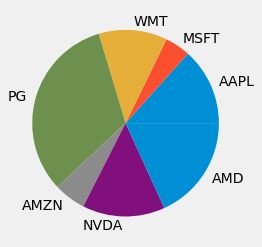

In [20]:
optimized_metrics = portfolio(res.x)
print("Expected Return={:.2f}%".format(optimized_metrics[0]*100))
print("Expected votality={:.2f}%".format(optimized_metrics[1]*100))
print("Sharpe Ratio={:.2f}".format(optimized_metrics[2]))
print("**OPTIMIZED WEIGHTS USING MAXIMUM DIVERSIFICATION**")
results.x
plt.pie(res.x, labels=assets)
plt.show()

In [21]:
import math
import numpy as np
import pandas as pd

def portfolio_return(weights, rets):
    return np.dot(weights.T, rets.mean()) * 252

def portfolio_variance(weights, rets):
    return np.dot(weights.T, np.dot(rets.cov(), weights)) * 252

def portfolio_volatility(weights, rets):
    return math.sqrt(portfolio_variance(weights, rets))

In [22]:
phi = np.array(number_of_symbols * [1 / number_of_symbols])
phi

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [23]:
def rel_risk_contributions(weights, rets=returns):
    vol = portfolio_volatility(weights, returns)
    cov = rets.cov()
    mvols = np.dot(cov, weights) / vol
    rc = mvols * weights
    rrc = rc / rc.sum()
    return rrc
rrc = rel_risk_contributions(phi)
rrc

array([0.13697359, 0.13173109, 0.05926323, 0.05380135, 0.14114775,
       0.23257051, 0.24451249])

In [24]:
def mse_risk_contributions(weights, target, rets=returns):
    rc = rel_risk_contributions(weights, rets)
    mse = ((rc - target) ** 2).mean()
    return mse * 100
mse_risk_contributions(phi, phi)
cons = {'type': 'eq', 'fun': lambda weights: weights.sum() - 1}
target = number_of_symbols * [1 / number_of_symbols,]  # risk parity as target
target = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]  # example risk budget as target
opt = minimize(lambda w: mse_risk_contributions(w, target=target),
               phi, bounds=bounds, constraints=cons)
opt

     fun: 0.3265306425690885
     jac: array([-0.00111224,  0.00015393,  0.00021605,  0.00010186, -0.00079792,
        0.00041572,  0.00138851])
 message: 'Optimization terminated successfully'
    nfev: 98
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.12278281, 0.12686731, 0.22451187, 0.24540145, 0.12279148,
       0.07925987, 0.07838521])

Expected Return=24.53%
Expected votality=22.08%
Sharpe Ratio=1.11
**OPTIMIZED WEIGHTS USING RISK PARITY**


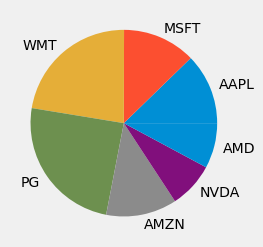

In [25]:
optimized_metrics = portfolio(opt.x)
print("Expected Return={:.2f}%".format(optimized_metrics[0]*100))
print("Expected votality={:.2f}%".format(optimized_metrics[1]*100))
print("Sharpe Ratio={:.2f}".format(optimized_metrics[2]))
print("**OPTIMIZED WEIGHTS USING RISK PARITY**")
results.x
plt.pie(opt.x, labels=assets)
plt.show()

In [28]:
import numpy as np
from scipy.optimize import minimize

def he_litterman(mu, P, Omega, Q, lambda_=1):
  
    """
    mu: vector of prior expected returns
    P: matrix of prior returns covariance
    Omega: matrix of views uncertainty
    Q: vector of views
    lambda_: risk-aversion parameter
    """
    n = len(mu)
    # calculate equilibrium returns
    tau = lambda_ * P.shape[0] / np.dot(np.dot(Q.T, np.linalg.inv(Omega)), Q)
    PI = tau * np.dot(np.dot(P, Q), np.linalg.inv(np.dot(np.dot(Q.T, P), Q) + Omega))
    er = mu + PI.dot(Q - np.dot(np.dot(P, Q),np.linalg.inv(np.dot(np.dot(Q.T, P), Q) + Omega)))
    # optimize portfolio
    def objective(w):
        return -np.dot(w, er)

    def constraint(w):
        return np.dot(np.ones(n), w) - 1

    bounds = [(0, 1) for i in range(n)]
    w0 = np.ones(n) / n
    result = minimize(objective, w0, bounds=bounds, constraints={"type": "eq", "fun": constraint})
    result.x
